Text(0.5, 1.0, 'Conjunto de Datos de Dos Clases')

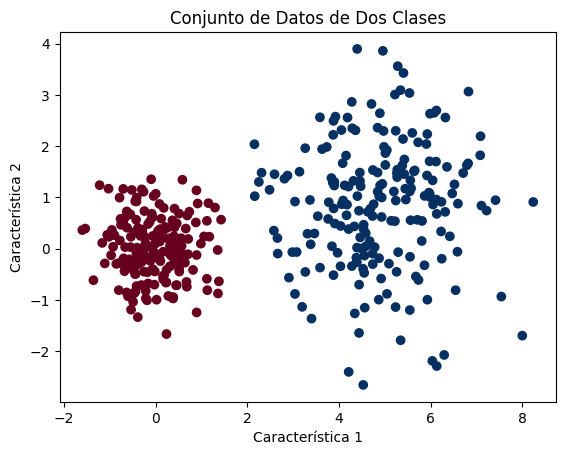

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min 
from sklearn.linear_model import LogisticRegression
# Generación de datos para dos clases
np.random.seed (0)
n_samples = 200 # número de muestras por clase
class_1 = 0.6 * np. random.randn(n_samples, 2) # generación de 200 muestras aleatorias bidimensionales (2D)
class_2 = 1.2 * np. random. randn(n_samples, 2) + np.array([5, 1]) # generación de 200 muestras aleatorias bidimensionales
# (2D) pero con corrimiento
X = np.vstack((class_1, class_2)) #apila verticalmente (concatenar hacia abajo) dos conjuntos de datos
y = np.hstack((np.zeros(n_samples), np.ones(n_samples))) # crea un vector de ceros con una longitud igual a
# n_samples para la clase O y clas 1 respectivamente
# Visualización de los datos
plt.scatter (X[:, 0], X[:, 1], c=y, cmap=plt. cm.RdBu)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Datos de Dos Clases') 

c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


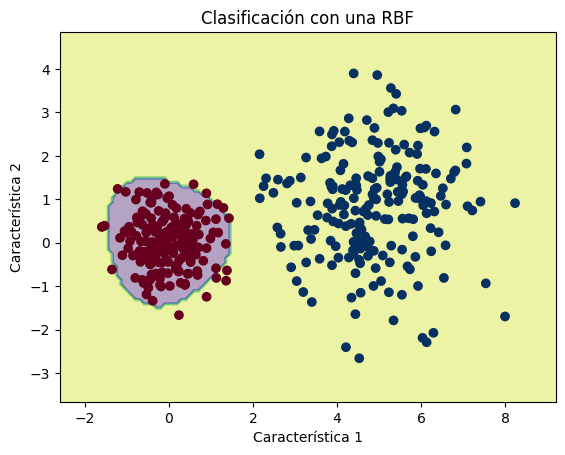

In [15]:
# Paso 2: Encontrar los centros de las neuronas RBF mediante K-Means
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
centers = kmeans.cluster_centers_ 

# Paso 3: Calcular el ancho de los kernels RBF
widths = pairwise_distances_argmin_min(X, centers)[1].mean()

# Paso 4: Calcular las activaciones de las neuronas RBF
def rbf_kernel(x, centers, width):
    return np.exp(-0.5 * (np.linalg.norm(x[:, np.newaxis] - centers, axis=2) / width) ** 2)
# x[:, np.newaxis] es una operación que cambia la forma de la matriz de características una operación
# Esto se hace para poder restar los centros de las neuronas centers, que tiene la forma (n_clusters, n_features)
# np.linalg.norm(x[:, np.newaxis] - centers, axis=2) calcula la norma Euclidiana
# entre cada punto de datos en x y todos los centros de las neuronas.
phi = rbf_kernel(X, centers, widths)
# Convertir phi a una matriz 2D
phi = phi.reshape(-1, n_clusters)
# convertimos la matriz phi a una matriz 2D utilizando .reshape(-1, n_clusters)

# Paso 5: Entrenar un modelo de clasificación en las activaciones de las neuronas RBF
rbf_model = LogisticRegression()
rbf_model.fit (phi, y)

# Generar nuevos datos de prueba
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# se calculan como los valores mínimos y máximos en la columna 0
# (Característica 1) de los datos originales X, con un pequeño ajuste
# hacia abajo y hacia arriba respectivamente.
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

XX, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange (y_min, y_max, 0.1))
# se crean utilizando np.meshgrid para crear una malla de puntos en el espacio de características
Z = rbf_model.predict(rbf_kernel(np.c_[XX.ravel(), yy.ravel()], centers, widths))
# Se utiliza el modelo de regresión logística rbf_model previamente entrenado para
# predecir dad lases de la nuevo de erarado, a ee) se calcula el arnel
#rbf_kernel. Luego, se pasa esta matriz de características a rbf_model. predict para
# obtener las predicciones de clase. Las predicciones se almacenan en la variable Z.
# Visualizar la frontera de decisión
Z = Z.reshape(XX.shape)
plt.contourf(XX, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel ('Característica 1')
plt.ylabel('Característica 2')
plt.title('Clasificación con una RBF')
plt.show ()